# Read csv files and plot learning curves for FedAvg experiment 1

In [1]:
import torch
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import time
import os
from os import walk
from os.path import join
os.getcwd()

# os.chdir('src')
# os.getcwd()

'C:\\Users\\YWANG\\ihpc-proj-seagate\\Ternary-Federated'

In [3]:
# load data frame from csv files
file_path_1 = './save'
_, _, filenames_1 = next(walk(file_path_1))
files_to_read_1 = [join(file_path_1,f) for f in filenames_1]
df_1 = [pd.read_csv(f) for f in files_to_read_1]
print(df_1)

# file_path_2 = '..\\save\\figures-mnist\\data_src_exp_1_non_iid'
# _, _, filenames_2 = next(walk(file_path_2))
# files_to_read_2 = [join(file_path_2,f) for f in filenames_2]
# df_2 = [pd.read_csv(f) for f in files_to_read_2]

[    Round  Test acc
0       1    0.1001
1       2    0.5647
2       3    0.7810
3       4    0.8357
4       5    0.8472
..    ...       ...
95     96    0.9131
96     97    0.9142
97     98    0.9118
98     99    0.9129
99    100    0.9133

[100 rows x 2 columns],     Round  Test acc
0       1    0.1000
1       2    0.1225
2       3    0.3046
3       4    0.5302
4       5    0.5369
..    ...       ...
95     96    0.8690
96     97    0.8484
97     98    0.8441
98     99    0.8364
99    100    0.8380

[100 rows x 2 columns],      Round  Test acc
0        1    0.1000
1        2    0.1070
2        3    0.3479
3        4    0.5235
4        5    0.5945
..     ...       ...
155    156    0.8509
156    157    0.8452
157    158    0.8386
158    159    0.8231
159    160    0.8397

[160 rows x 2 columns]]


In [4]:
# define a function for making monotonically incerasing learning curve
def make_learning_curve(x):
    """
    Use this function to get monotonically incerasing learning curve
    from an input list x
    """
    running_max=0
    y=[0]*len(x)
    for idx, value in enumerate(x):
        running_max = max(x[:idx+1])
        y[idx] = running_max if x[idx] < running_max else x[idx]
    return y

In [5]:


# # set the label names
# run_labels=[0]*8
# run_labels[0] = '$E=5$, $B=10$, $C=0.0$'
# run_labels[1] = '$E=5$, $B=10$, $C=0.1$'
# run_labels[2] = '$E=5$, $B=10$, $C=0.2$'
# run_labels[3] = '$E=5$, $B=10$, $C=0.5$'
# run_labels[4] = '$E=5$, $B=\infty$, $C=0.0$'
# run_labels[5] = '$E=5$, $B=\infty$, $C=0.1$'
# run_labels[6] = '$E=5$, $B=\infty$, $C=0.2$'
# run_labels[7] = '$E=5$, $B=\infty$, $C=0.5$'

# # define line style and color
# run_colors, run_linestyles = [0]*8, [0]*8

# for i in range(4):
#     run_linestyles[i] = '-'
# for i in range(4,8):
#     run_linestyles[i] = '--'

# run_colors[0], run_colors[4] = 'dodgerblue', 'dodgerblue'
# run_colors[1], run_colors[5] = 'deeppink', 'deeppink'
# run_colors[2], run_colors[6] = 'orange', 'orange'
# run_colors[3], run_colors[7] = 'springgreen', 'springgreen'

### choosing color and linestyle
Please see https://matplotlib.org/stable/gallery/color/named_colors.html and https://matplotlib.org/3.0.3/gallery/lines_bars_and_markers/line_styles_reference.html

In [6]:
# # plot the first figure
# run_colors = 'dodgerblue'
# run_labels = '3 clients, IID, T-FedAvg'
# run_linestyles = '-'

# step_1=1
# plt.figure()
# for i, data in enumerate(df_1):
# #     lc = make_learning_curve(data['Test acc'].tolist())
#     lc = data['Test acc'].tolist()
#     x = [dx for j, dx in enumerate(data['Round'].tolist()) if j % step_1 == 0]
#     y = [dy for j, dy in enumerate(lc) if j % step_1 == 0]  
#     plt.plot(x,y,label=run_labels, linestyle=run_linestyles, color=run_colors,linewidth=2)
#     plt.legend(loc='lower right')
# plt.grid()
# # plt.tight_layout()
# plt.xlim(0,100)
# plt.ylim(0.75,0.95)
# plt.xlabel('Comm. rounds')
# plt.ylabel('Test acc')
# # plt.savefig('..\\save\\figures-mnist\\fedavg-exp-1-iid-mono.png')

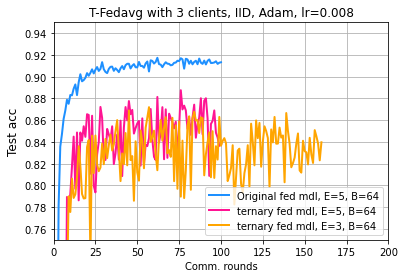

In [9]:
# plot figure of running results
# get the number of runs to be plotted
n_fig = len(df_1)

run_labels, run_colors, run_linestyles = [0]*n_fig, [0]*n_fig, [0]*n_fig

# set the labels 
run_labels[0] = 'Original fed mdl, E=5, B=64'
run_labels[1] = 'ternary fed mdl, E=5, B=64'
run_labels[2] = 'ternary fed mdl, E=3, B=64'

# set the line styles
run_linestyles[0] = '-'
run_linestyles[1] = '-'
run_linestyles[2] = '-'

# set the line colors
run_colors[0] = 'dodgerblue'
run_colors[1] = 'deeppink'
run_colors[2] = 'orange'

# set the option for making monotonically incerasing learning curve
mlc_flag = False

# set granuality of data points
step_2=1
plt.figure()
for i, data in enumerate(df_1):
    if mlc_flag:
        lc = make_learning_curve(data['Test acc'].tolist())
    else:
        lc = data['Test acc'].tolist()
    x = [dx for j, dx in enumerate(data['Round'].tolist()) if j % step_2 == 0]
    y = [dy for j, dy in enumerate(lc) if j % step_2 == 0]   
    plt.plot(x,y,label=run_labels[i], linestyle=run_linestyles[i], color=run_colors[i], linewidth=2)
    plt.legend(loc='lower right')
plt.grid()
# plt.tight_layout()
plt.xlim(0,200)
plt.ylim(0.75,0.95)
plt.yticks([.76, .78, .80, .82, .84, .86, .88, .90, .92, .94])
plt.xlabel('Comm. rounds')
plt.ylabel('Test acc', size='large')
plt.title('T-Fedavg with 3 clients, IID, Adam, lr=0.008')

# save figures
save_fig_flag = True
save_fig_path = './save/T-FedAvg_' + time.strftime('%y-%m-%d-%H-%M-%S.png')
if save_fig_flag:
    plt.savefig(save_fig_path)